In [23]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from sympy import symbols, diff
from sklearn.linear_model import LinearRegression

%matplotlib inline

## 3D Charts
### $$f(x,y) = \frac{1}{3^{-x^2 - y^2} + 1}$$
minimise
### $$f(x,y) = \frac{1}{r + 1}$$
where r is equal to $3^{-x^2 - y^2}$

In [2]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1/(r + 1)

In [3]:
x_data = np.linspace(start=-2, stop=2, num=200)
y_data = np.linspace(start=-2, stop=2, num=200)

x_data, y_data = np.meshgrid(x_data, y_data)

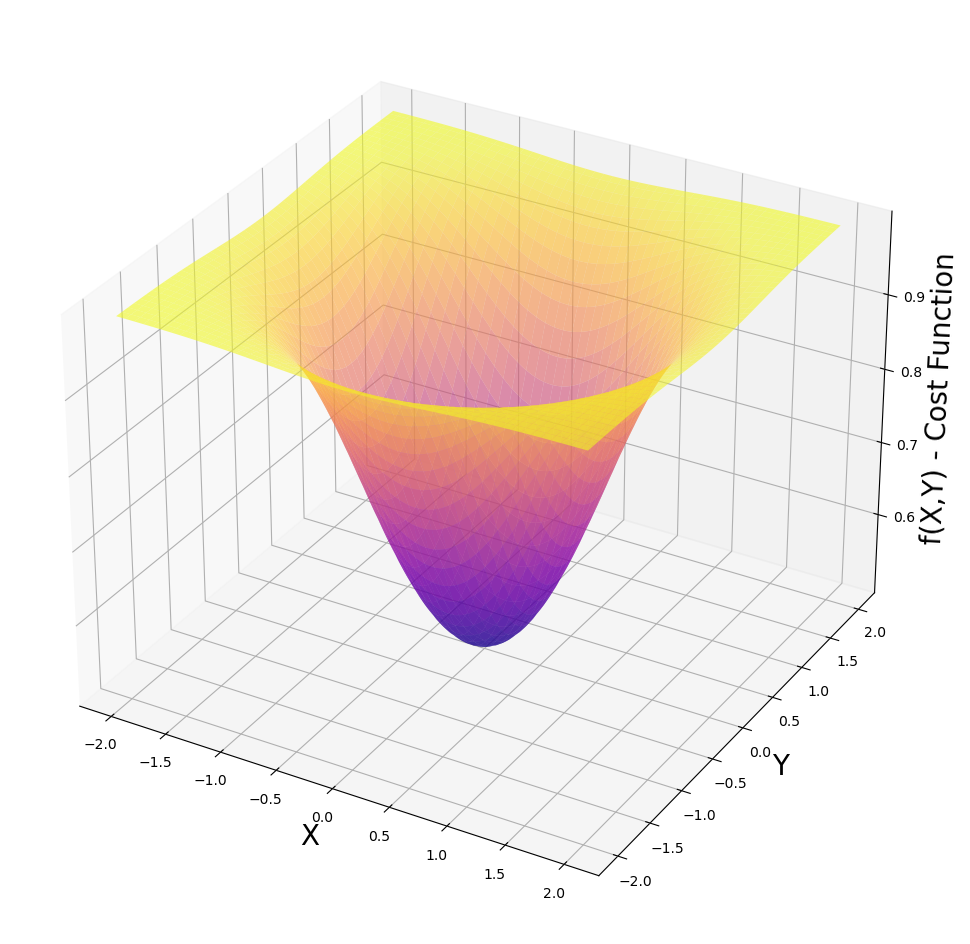

In [20]:
# Generating 3d plot
figure = plt.figure(figsize=[16, 12])
ax = figure.add_subplot(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(X,Y) - Cost Function', fontsize=20)

ax.plot_surface(x_data, y_data, f(x_data, y_data), cmap=cm.plasma, alpha=0.6)

plt.show()

## Partial Derrivatives and SymPy

In [5]:
a, b = symbols('x, y')
f(a, b)
print("partial derrivarite with respect to x", diff(f(a, b), a))
print("partial derrivarite with respect to y", diff(f(a, b), b))
print("value of function at the point x=1.8, y=1.0 is",f(a, b).evalf(subs={a:1.8, b:1.0}))
print("value of the derrivative respect to x at the point x=1.8, y=1.0 is",diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

partial derrivarite with respect to x 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
partial derrivarite with respect to y 2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
value of function at the point x=1.8, y=1.0 is 0.990604794032582
value of the derrivative respect to x at the point x=1.8, y=1.0 is 0.0368089716197505


## Batch Gradient Descent

In [12]:
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # this is our initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.append(values_array, params.reshape(1,2), axis=0)
    
print("Values of gradients", gradients)
print("Minium occurs at x value of", params[0])
print("Minium occurs at y value of", params[1])
print("The cost is:", f(params[0], params[1]))

(1, 2)
Values of gradients [0.000461440542096373 0.000256355856720208]
Minium occurs at x value of 0.000793898510134722
Minium occurs at y value of 0.000441054727852623
The cost is: 0.500000226534985


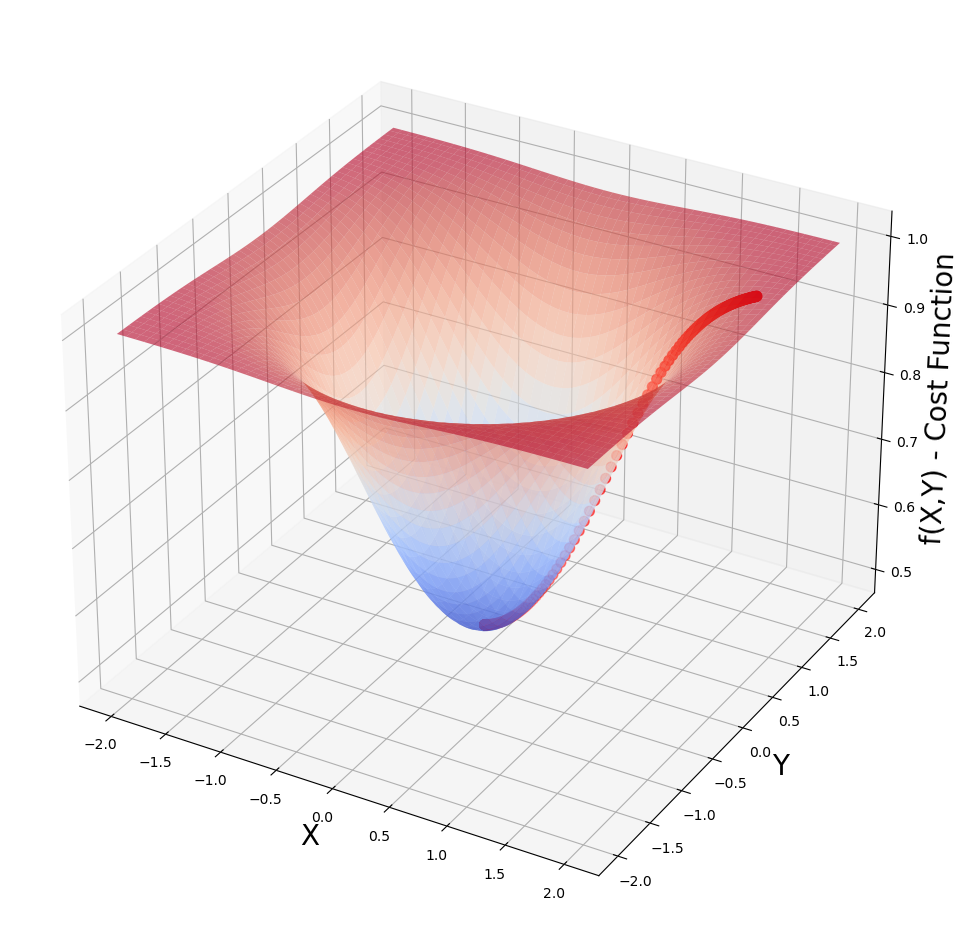

In [22]:
# Plotting the Optimization
figure = plt.figure(figsize=[16, 12])
ax = figure.add_subplot(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(X,Y) - Cost Function', fontsize=20)

ax.plot_surface(x_data, y_data, f(x_data, y_data), cmap=cm.coolwarm, alpha=0.6)
ax.scatter(values_array[:,0], values_array[:,1], f(values_array[:,0],values_array[:,1]), color='red', s=50)

plt.show()

## MSE(Mean Squared Error)

### $$RSS = \sum_{i=1}^{n} \big(y^{(i)} - h_{\theta}(x^{(i)})\big)^2$$
### $$MSE = \frac{1}{n}\sum_{i=1}^{n} \big(y^{(i)} - h_{\theta}(x^{(i)})\big)^2$$

In [ ]:
# Sample data